In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import re

In [3]:
datapath = '../../college-covid19-dataset/data'

### Import and Clean Data

In [21]:
df = pd.read_csv(datapath + '/daily.csv')
old_cols = df.columns.values.copy()
old_cols[0] = 'School'
df.columns = old_cols
df

,School,Date,Tests,Confirmed
0,Michigan,2020-03-14,41.0,7
1,Michigan,2020-03-15,409.0,41
2,Michigan,2020-03-16,409.0,41
3,Michigan,2020-03-17,409.0,41
4,Michigan,2020-03-18,409.0,41
...,...,...,...,...
1580,Maryland,2020-11-04,45421.0,554
1581,Northwestern,2020-11-05,46830.0,285
1582,Michigan,2020-11-05,60855.0,2143
1583,Maryland,2020-11-05,45445.0,556


In [24]:
df.index = pd.MultiIndex.from_frame(df[['School', 'Date']])
df.drop(['School', 'Date'], axis = 1, inplace = True)

In [25]:
df

Tests  Confirmed
School         Date                          
Michigan       2020-03-14     41.0          7
               2020-03-15    409.0         41
               2020-03-16    409.0         41
               2020-03-17    409.0         41
               2020-03-18    409.0         41
...                            ...        ...
Maryland       2020-11-04  45421.0        554
Northwestern   2020-11-05  46830.0        285
Michigan       2020-11-05  60855.0       2143
Maryland       2020-11-05  45445.0        556
Michigan State 2020-11-05   5783.0       2319

[1585 rows x 2 columns]

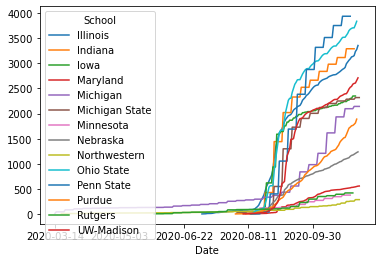

In [27]:
df['Confirmed'].unstack().T.plot()